<a href="https://colab.research.google.com/github/bilalelali2001/colab-projects/blob/main/car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing the dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics


data collaection and processing

In [2]:
# loading the data from csv file to pandas dataframe
car_dataset = pd.read_csv('/content/CAR DETAILS FROM CAR DEKHO.csv')

In [3]:
car_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [5]:
car_dataset.shape

(4340, 8)

In [6]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


there is no null values

In [7]:
car_dataset.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

checking the distribution of categorical data

In [10]:
print(car_dataset.fuel.value_counts())
print(car_dataset.seller_type.value_counts())
print(car_dataset.transmission.value_counts())
print(car_dataset.owner.value_counts())


Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: fuel, dtype: int64
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: seller_type, dtype: int64
Manual       3892
Automatic     448
Name: transmission, dtype: int64
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: owner, dtype: int64


Encoding the categorical data

In [11]:
car_dataset.replace({'fuel':{'Petrol': 0 ,'Diesel': 1 ,'CNG': 2 , 'LPG' : 3 , 'Electric' : 4 }}, inplace = True)
car_dataset.replace({'seller_type':{'Individual': 0 ,'Dealer': 1 ,'Trustmark Dealer': 2 }}, inplace = True)
car_dataset.replace({'transmission':{'Manual': 0 ,'Automatic': 1 }}, inplace = True)
car_dataset.replace({'owner':{'First Owner': 0 ,'Second Owner': 1 ,'Third Owner': 2 , 'Fourth & Above Owner' : 3 , 'Test Drive Car' : 4 }}, inplace = True)



In [12]:
car_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,0,0,0,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,0,0,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,0,0,0
3,Datsun RediGO T Option,2017,250000,46000,0,0,0,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,0,0,1


splitting data into training data and test data

In [15]:
X = car_dataset.drop(['name','selling_price'], axis=1)
Y = car_dataset['selling_price']

In [21]:
X_train , X_test , Y_train , Y_test = train_test_split(X, Y , test_size=0.3 ,random_state=2)

model training

In [22]:
# loading the linear regression model
lin_reg_model = LinearRegression()

In [23]:
lin_reg_model.fit(X_train , Y_train)

LinearRegression()

model evaluation

In [24]:
# predicition on training data
training_data_predicition = lin_reg_model.predict(X_train)

In [25]:
# R squared error
error_score = metrics.r2_score(Y_train ,training_data_predicition)
print('R squared error :', error_score)

R squared error : 0.42978307103638735


visulaize the actual prices and predicted prices

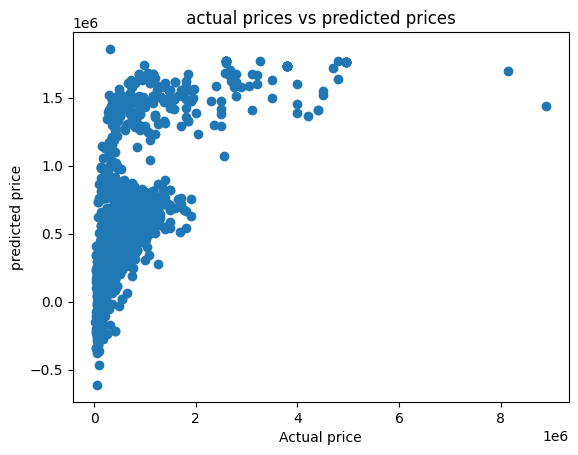

In [26]:
plt.scatter(Y_train ,training_data_predicition)
plt.xlabel("Actual price")
plt.ylabel("predicted price")
plt.title(" actual prices vs predicted prices ")
plt.show()

In [27]:
# prediciton on test data
test_data_predicition = lin_reg_model.predict(X_test)

In [28]:
# R squared error
error_score = metrics.r2_score(Y_test ,test_data_predicition)
print('R squared error :', error_score)

R squared error : 0.4713390351886021


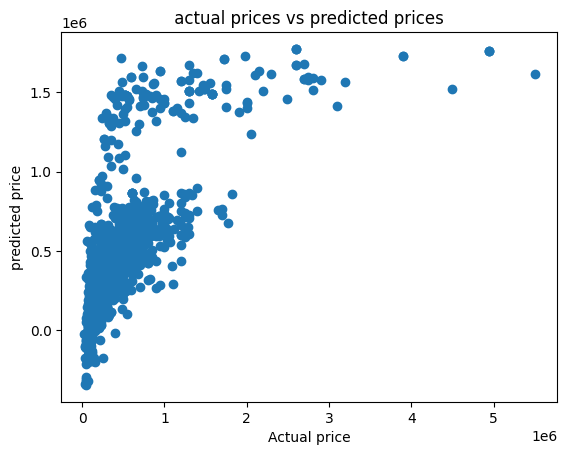

In [29]:
plt.scatter(Y_test ,test_data_predicition)
plt.xlabel("Actual price")
plt.ylabel("predicted price")
plt.title(" actual prices vs predicted prices ")
plt.show()

lasso regression

In [30]:
# loading the linear regression model
lass_reg_model = Lasso()

In [31]:
lass_reg_model.fit(X_train , Y_train)

Lasso()

model evaluation

In [32]:
# predicition on training data
training_data_predicition = lass_reg_model.predict(X_train)

In [33]:
# R squared error
error_score = metrics.r2_score(Y_train ,training_data_predicition)
print('R squared error :', error_score)

R squared error : 0.42978307098686475


visulaize the actual prices and predicted prices

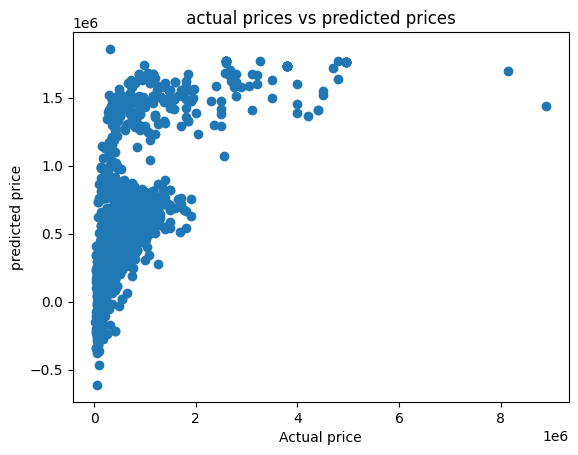

In [34]:
plt.scatter(Y_train ,training_data_predicition)
plt.xlabel("Actual price")
plt.ylabel("predicted price")
plt.title(" actual prices vs predicted prices ")
plt.show()

In [35]:
# prediciton on test data
test_data_predicition = lass_reg_model.predict(X_test)

In [36]:
# R squared error
error_score = metrics.r2_score(Y_test ,test_data_predicition)
print('R squared error :', error_score)

R squared error : 0.4713401812614847


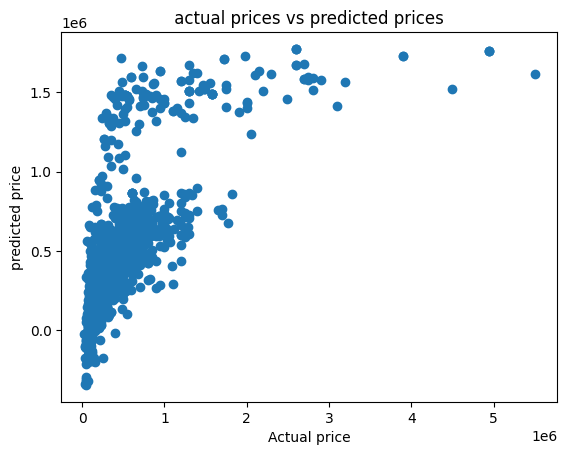

In [37]:
plt.scatter(Y_test ,test_data_predicition)
plt.xlabel("Actual price")
plt.ylabel("predicted price")
plt.title(" actual prices vs predicted prices ")
plt.show()